# 3: Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import os
import string
import re # regular expression
import HMM as hmm
# import keras.preprocessing.text

In [2]:
def parse_map(lines):
    counter = 0
    x = []
    mapping = {}

    for line in lines:
        elem = []
        
        for word in line:
            # replace the following characters with '', i.e. remove them
            #word = re.sub(r'[]_`\', '', word)
            word = re.sub(r'[^\w]', '', word).lower()
                          # {|\}0123456789^\n\t
            # convert all words to lower case
            word = word.lower()
            
            if word not in mapping:
                mapping[word] = counter
                counter += 1
            elem.append(mapping[word])
        x.append(elem)

    return x, mapping

def mapping_reverser(mapping):
    mapping_r = {}

    for key in mapping:
        mapping_r[mapping[key]] = key

    return mapping_r

In [3]:
# get syllable info

syllable = open('data/Syllable_dictionary.txt','r')
syllable_dic = {}
    
for line in syllable:
    line = line.split()
    word = line[0]
    rem = line[1: len(line)]
    syllable_dic[word] = rem

In [4]:
def open_file(files):
    '''Keeps track of lines in an array and words in a dictionary mapping to word frequency'''
    words = {}
    lines = [] 
    
    for f in files:
        file = open(f, 'r')
        
        for line in file:
            if  len(line) < 10:
                continue
            line = line.strip()
            line = line.lower() # turn everything into lower case
            line = "".join(l for l in line if l not in string.punctuation) # take out all punctuation
            line = line.split() # split the line and then add it to lines

            lines.append(line)

            # increase frequency if item already exists, create it if it doesn't
            for w in line:
                try:
                    words[w] += 1
                except KeyError:
                    words[w] = 1
    
    return words, lines

In [5]:
words, lines = open_file(["data/shakespeare.txt", "data/spenser.txt"]) 
x, mapping =  parse_map(lines)

# Rhyme

In [6]:
import nltk
# nltk.download('cmudict')
d = nltk.corpus.cmudict.dict()
rhyme_dic = {} # only contain words with stressed ending
for word in words:
    try:
        for syl in reversed(d[word][0]):
            # if it's the ending rhyme
            if syl[-1] == '1' or syl[-1] == '0':
                if syl[-1] == '1':
                    if syl[:-1] in rhyme_dic:
                        rhyme_dic[syl[:-1]] = rhyme_dic[syl[:-1]] + [word]
                    else:
                        rhyme_dic[syl[:-1]] = [word]
                break
    except Exception as e:
        print(e)
print(rhyme_dic)

'1'
'beautys'
'riper'
'feedst'
'selfsubstantial'
'buriest'
'churl'
'makst'
'niggarding'
'glutton'
'2'
'alleating'
'thriftless'
'couldst'
'feelst'
'3'
'viewest'
'renewest'
'unbless'
'uneared'
'tillage'
'selflove'
'4'
'unthrifty'
'loveliness'
'beauteous'
'bounteous'
'profitless'
'usurer'
'canst'
'tombed'
'5'
'neverresting'
'oersnowed'
'bareness'
'6'
'selfkilled'
'happies'
'thats'
'refigured'
'shouldst'
'selfwilled'
'7'
'newappearing'
'steepup'
'highmost'
'reeleth'
'duteous'
'unlooked'
'diest'
'8'
'lovst'
'receivst'
'welltuned'
'singleness'
'9'
'consumst'
'makeless'
'unthrift'
'murdrous'
'10'
'bearst'
'unprovident'
'gainst'
'stickst'
'ruinate'
'kindhearted'
'11'
'growst'
'departest'
'youngly'
'bestowst'
'mayst'
'convertest'
'threescore'
'barrenly'
'12'
'silvered'
'oer'
'erst'
'girded'
'bristly'
'13'
'honour'
'unthrifts'
'14'
'methinks'
'dearths'
'wouldst'
'15'
'presenteth'
'nought'
'whereon'
'selfsame'
'vaunt'
'inconstant'
'debateth'
'engraft'
'16'
'wherefore'
'liker'
'17'
'yellowed'
'met

# Stress Pattern

In [7]:
stress_dic = {}
for word in words:
    try:
        stress = ''
        for syl in d[word][0]:
            if syl[-1] == '1':
                stress += '1'
            elif syl[-1] == '0':
                stress += '0'
        stress_dic[word] = stress
    except Exception as e:
        print(e)
print(stress_dic)

'1'
'beautys'
'riper'
'feedst'
'selfsubstantial'
'buriest'
'churl'
'makst'
'niggarding'
'glutton'
'2'
'alleating'
'thriftless'
'couldst'
'feelst'
'3'
'viewest'
'renewest'
'unbless'
'uneared'
'tillage'
'selflove'
'4'
'unthrifty'
'loveliness'
'beauteous'
'bounteous'
'profitless'
'usurer'
'canst'
'tombed'
'5'
'neverresting'
'oersnowed'
'bareness'
'6'
'selfkilled'
'happies'
'thats'
'refigured'
'shouldst'
'selfwilled'
'7'
'newappearing'
'steepup'
'highmost'
'reeleth'
'duteous'
'unlooked'
'diest'
'8'
'lovst'
'receivst'
'welltuned'
'singleness'
'9'
'consumst'
'makeless'
'unthrift'
'murdrous'
'10'
'bearst'
'unprovident'
'gainst'
'stickst'
'ruinate'
'kindhearted'
'11'
'growst'
'departest'
'youngly'
'bestowst'
'mayst'
'convertest'
'threescore'
'barrenly'
'12'
'silvered'
'oer'
'erst'
'girded'
'bristly'
'13'
'honour'
'unthrifts'
'14'
'methinks'
'dearths'
'wouldst'
'15'
'presenteth'
'nought'
'whereon'
'selfsame'
'vaunt'
'inconstant'
'debateth'
'engraft'
'16'
'wherefore'
'liker'
'17'
'yellowed'
'met

'faery'
'fordone'
'handmaid'
'queene'
'heares'
'richladen'
'soom'
'enchased'
'lustfull'
'sprites'
'plights'
'venemous'
'furies'
'snaky'
'accursed'
'falseforged'
'meed'
'noyous'
'reascend'
'thonly'
'loveafamished'
'disconsolate'
'unspotted'
'pleasauns'
{'from': '1', 'fairest': '10', 'creatures': '10', 'we': '1', 'desire': '010', 'increase': '01', 'that': '1', 'thereby': '11', 'rose': '1', 'might': '1', 'never': '10', 'die': '1', 'but': '1', 'as': '1', 'the': '0', 'should': '1', 'by': '1', 'time': '1', 'decease': '01', 'his': '1', 'tender': '10', 'heir': '1', 'bear': '1', 'memory': '100', 'thou': '1', 'contracted': '100', 'to': '1', 'thine': '1', 'own': '1', 'bright': '1', 'eyes': '1', 'thy': '1', 'lights': '1', 'flame': '1', 'with': '1', 'fuel': '10', 'making': '10', 'a': '0', 'famine': '10', 'where': '1', 'abundance': '010', 'lies': '1', 'self': '1', 'foe': '1', 'sweet': '1', 'too': '1', 'cruel': '10', 'art': '1', 'now': '1', 'worlds': '1', 'fresh': '1', 'ornament': '100', 'and': '0', 

# Poetry Generation

In [99]:
states = 12
iterations = 30
x, mapping =  parse_map(lines)
HMM = hmm.unsupervised_HMM(x, states, iterations)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29


In [136]:
x, mapping = parse_map(lines)
mapping_r =  mapping_reverser(mapping)

poem_length = 14
syllable_length = 10

random.seed(1999)
r = np.random.choice(list(rhyme_dic.keys()), size=(7,), replace=False)
r = np.array(r)
print(r)
rhyme_scheme = [r[0], r[1], r[0], r[1], r[2], r[3], r[2], r[3], r[4], r[5], r[4], r[5], r[6], r[6]]
states_sonnet = []
for i in range(poem_length): 
    emission, state = HMM.generate_emission_rhyme_meter(syllable_length, mapping, mapping_r, rhyme_scheme[i], rhyme_dic, stress_dic)
    sentence = [mapping_r[i] for i in list(emission)]
    states_sonnet = np.concatenate((states_sonnet, list(state)))
    print(' '.join(sentence).capitalize())
print(states_sonnet)

['UW' 'EH' 'IY' 'OW' 'IH' 'AY' 'AA']
Devotion sounds and bloody locks and used
The fleece repent and rough and used in prayers
The filled in sense effect and making true
In filled and deigned and blood and used the stair
And loss and puts repose acquit her streams
A told the sounds and summers fleece and wont
And deigned and deigned and mortal sounds and reap
The scope effect the fleece and deigned and shows
Filled and filled the majesty nor and filled
In gross her scope and rough and filled surmise
In kind and filled and even either fixed
And deigned temptation filled and deigned and buy
And shows and used in blood and rough and calms
Upon and cannot filled and calms upon
[ 9.  1.  3.  8.  7.  0.  2.  9.  1.  0.  3.  7.  0.  2.  4.  8.  9.  1.
 11. 10. 10.  0.  3.  9.  4.  1.  3.  7.  3.  7.  0.  2.  4. 11.  3.  7.
  0.  5.  5.  6.  6.  6.  6.  6.  9.  1.  3.  9.  1.  3.  5.  3.  7.  3.
  7.  3.  9.  1.  3.  8.  9.  1. 11.  9.  1.  3.  7.  0. 11.  1.  3.  7.
  8.  7.  0.  3.  8.  4.  

# Analysis

In [107]:
# for each of the 5 randomly chosen states, write the top 10 words by probability
# We will just use state 0,1,2,3,4 for convenience
for i in range(12):
    top_10_idx = np.argsort(HMM.O[i])[-10:]
    top_10_idx = reversed(top_10_idx)
    top_10_words = [mapping_r[i] for i in top_10_idx]
    print('state ' + str(i))
    print(top_10_words)
# note that these might be different from what's in the report since we've ran hmm multiple times

state 0
['and', 'but', 'or', 'for', 'which', 'that', 'so', 'then', 'to', 'thus']
state 1
['birth', 'drudge', 'true', 'love', 'self', 'heart', 'eyes', 'doth', 'life', 'beauty']
state 2
['used', 'allured', 'but', 'and', 'if', 'o', 'when', 'yet', 'for', 'then']
state 3
['and', 'that', 'but', 'for', 'so', 'than', 'yet', 'to', 'when', 'nor']
state 4
['allured', 'in', 'thou', 'all', 'that', 'for', 'like', 'when', 'as', 'those']
state 5
['puts', 'drudge', 'entrap', 'shows', 'i', 'true', 'used', 'to', 'that', 'not']
state 6
['streams', 'cast', 'allured', 'i', 'be', 'have', 'me', 'thee', 'to', 'by']
state 7
['birth', 'hush', 'shows', 'thou', 'thee', 'with', 'his', 'by', 'love', 'more']
state 8
['hearst', 'enclose', 'reap', 'and', 'the', 'true', 'to', 'with', 'so', 'but']
state 9
['true', 'the', 'my', 'thy', 'her', 'your', 'their', 'this', 'all', 'me']
state 10
['true', 'shows', 'is', 'a', 'of', 'it', 'mine', 'so', 'thou', 'art']
state 11
['shows', 'of', 'in', 'to', 'with', 'true', 'from', 'for'

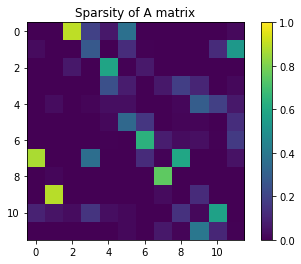

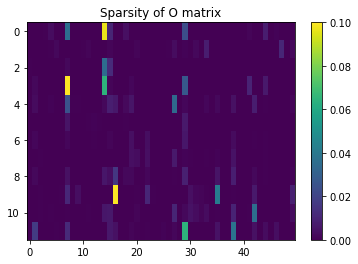

In [103]:
from HMM_helper import (
    text_to_wordcloud,
#     states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

import os
from IPython.display import HTML

visualize_sparsities(HMM, O_max_cols=50)

In [115]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import animation
from matplotlib.animation import FuncAnimation

def mask():
    # Parameters.
    r = 128
    d = 2 * r + 1

    # Get points in a circle.
    y, x = np.ogrid[-r:d-r, -r:d-r]
    circle = (x**2 + y**2 <= r**2)

    # Create mask.
    mask = 255 * np.ones((d, d), dtype=np.uint8)
    mask[circle] = 0

    return mask

def text_to_wordcloud(text, max_words=50, title='', show=True):
    plt.close('all')

    # Generate a wordcloud image.
    wordcloud = WordCloud(random_state=0,
                          max_words=max_words,
                          background_color='white',
                          mask=mask()).generate(text)

    # Show the image.
    if show:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.show()

    return wordcloud

def states_to_wordclouds(hmm, mapping_r, max_words=50, show=True):
    wordclouds = []
    for i in range(12):
#         idx = np.random.choice(range(hmm.D), size=(30, ), replace=False)
#         words = [mapping_r[i] for i in idx]
        idx = np.argsort(hmm.O[i])[-max_words:]
        words = [mapping_r[i] for i in idx]
        sentence_str = ' '.join(words)
        wordclouds.append(text_to_wordcloud(sentence_str, max_words=max_words, title='State %d' % i, show=show))
    return wordclouds



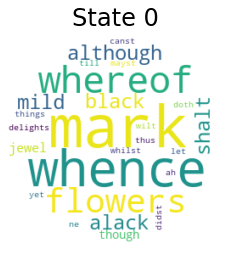

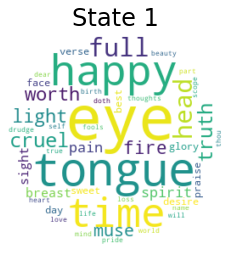

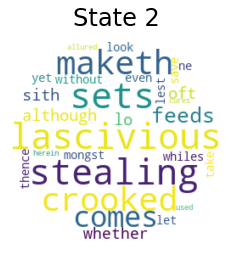

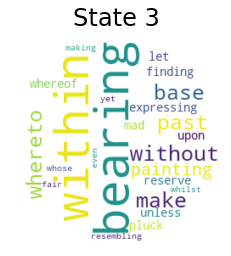

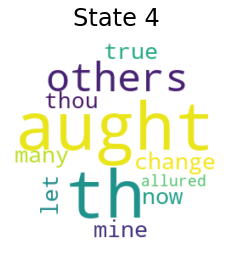

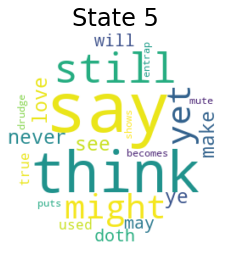

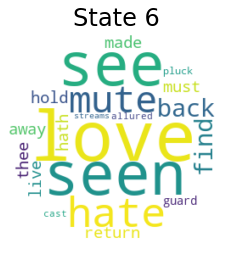

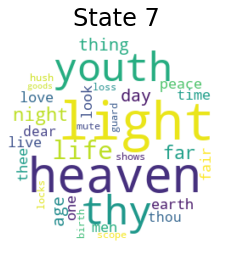

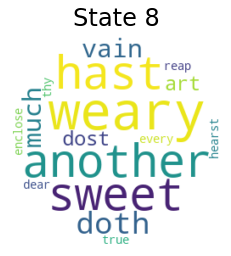

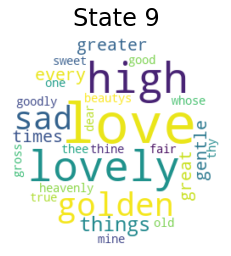

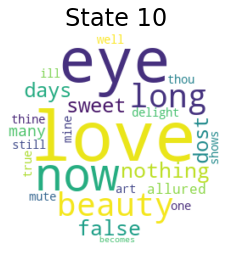

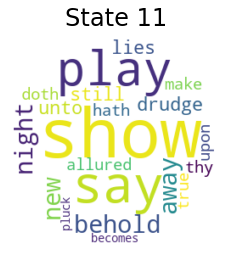

In [116]:
wordclouds = states_to_wordclouds(HMM, mapping_r)

In [138]:
def animate_emission(hmm, obs_map, wordclouds, states, M=8, height=12, width=12, delay=1, n_states=12):
    # Parameters.
    lim = 1200
    text_x_offset = 40
    text_y_offset = 80
    x_offset = 580
    y_offset = 520
    R = 420
    r = 100
    arrow_size = 20
    arrow_p1 = 0.03
    arrow_p2 = 0.02
    arrow_p3 = 0.06
    

    # Initialize plot.    
    fig, ax = plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    ax.grid('off')
    plt.axis('off')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])

    # Plot each wordcloud.
    for i, wordcloud in enumerate(wordclouds):
        x = x_offset + int(R * np.cos(np.pi * 2 * i / n_states))
        y = y_offset + int(R * np.sin(np.pi * 2 * i / n_states))
        ax.imshow(wordcloud.to_array(), extent=(x - r, x + r, y - r, y + r), aspect='auto', zorder=-1)

    # Initialize text.
    text = ax.text(text_x_offset, lim - text_y_offset, '', fontsize=24)
        
    # Make the arrows.
    zorder_mult = n_states ** 2 * 100
    arrows = []
    for i in range(n_states):
        row = []
        for j in range(n_states):
            # Arrow coordinates.
            x_i = x_offset + R * np.cos(np.pi * 2 * i / n_states)
            y_i = y_offset + R * np.sin(np.pi * 2 * i / n_states)
            x_j = x_offset + R * np.cos(np.pi * 2 * j / n_states)
            y_j = y_offset + R * np.sin(np.pi * 2 * j / n_states)
            
            dx = x_j - x_i
            dy = y_j - y_i
            d = np.sqrt(dx**2 + dy**2)

            if i != j:
                arrow = ax.arrow(x_i + (r/d + arrow_p1) * dx + arrow_p2 * dy,
                                 y_i + (r/d + arrow_p1) * dy + arrow_p2 * dx,
                                 (1 - 2 * r/d - arrow_p3) * dx,
                                 (1 - 2 * r/d - arrow_p3) * dy,
                                 color=(1 - hmm.A[i,j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i,j] * zorder_mult))
            else:
                arrow = ax.arrow(x_i, y_i, 0, 0,
                                 color=(1 - hmm.A[i,j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i,j] * zorder_mult))

            row.append(arrow)
        arrows.append(row)

#     emission, states = hmm.generate_emission(M)

    def animate(i):
        if i >= delay:
            i -= delay

            if i == 0:
                arrows[states[0]][states[0]].set_color('red')
            elif i == 1:
                arrows[states[0]][states[0]].set_color((1 - hmm.A[states[0], states[0]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')
            else:
                arrows[states[i - 2]][states[i - 1]].set_color((1 - hmm.A[states[i - 2], states[i - 1]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')

            # Set text.
            text.set_text(' '.join([obs_map_r[e] for e in emission][:i+1]).capitalize())

            return arrows + [text]

    # Animate!
    print('\nAnimating...')
    anim = FuncAnimation(fig, animate, frames=M+delay, interval=1000)

    return anim

[ 9  1  3  8  7  0  2  9  1  0  3  7  0  2  4  8  9  1 11 10 10  0  3  9
  4  1  3  7  3  7  0  2  4 11  3  7  0  5  5  6  6  6  6  6  9  1  3  9
  1  3  5  3  7  3  7  3  9  1  3  8  9  1 11  9  1  3  7  0 11  1  3  7
  8  7  0  3  8  4  9  9  1  3  7  3  7  8  4 10  3  7  0  3  6  6  3  7
  8  7  3  7  3 11  3  7  0  2  4 10  3  7  3  7  0  3  4  1  3  7  0]

Animating...


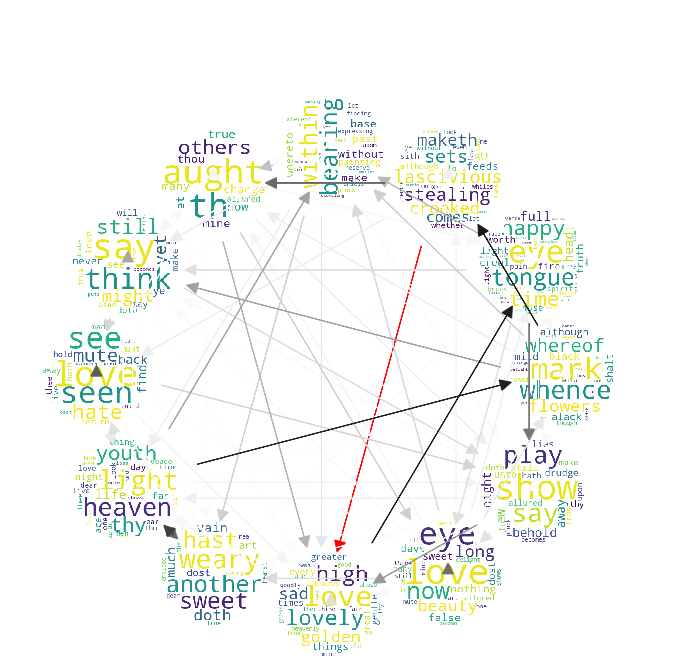

In [140]:
states_sonnet = states_sonnet.astype(int)
print(states_sonnet)
anim = animate_emission(HMM, mapping_r, wordclouds, states_sonnet, M=8)
HTML(anim.to_html5_video())

1) not all words are likely to be the first word
2) keep sonnet rhyme by discarding words until the right format is found (abab cdcd efef gg)
3) keep stressed / unstressed by discarding until you find the correct one

problems:
1) after rhyming and meter are fixed tightly (discarding unqualified words), the poem makes less sense,
the starting word becomes some frequent words like "And" "In" (prob trying to find the word with just right sylable, so less choice)